# Import Packages

In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

import cv2
import tensorflow as tf
from tqdm import tqdm

In [2]:
class_names = ['normal','tumour']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [3]:
def load_data():

    datasets = ['C:/Users/chandu/Music/bone tumour/train', 'C:/Users/chandu/Music/bone tumour/test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Users/chandu/Music/bone tumour/train


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:01<00:00, 44.06it/s]


Loading C:/Users/chandu/Music/bone tumour/test


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:01<00:00, 34.21it/s]


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 87
Number of testing examples: 87
Each image is of size: (150, 150)


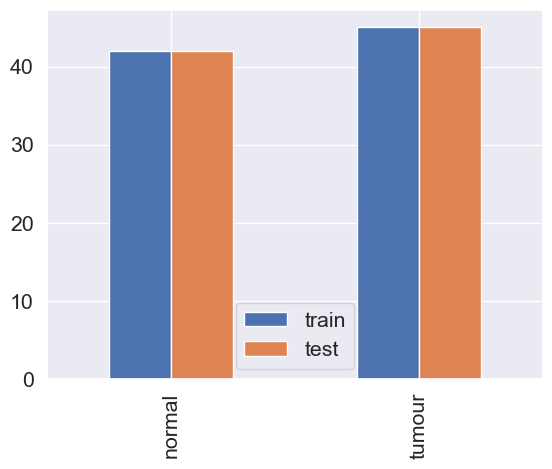

In [7]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(5):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

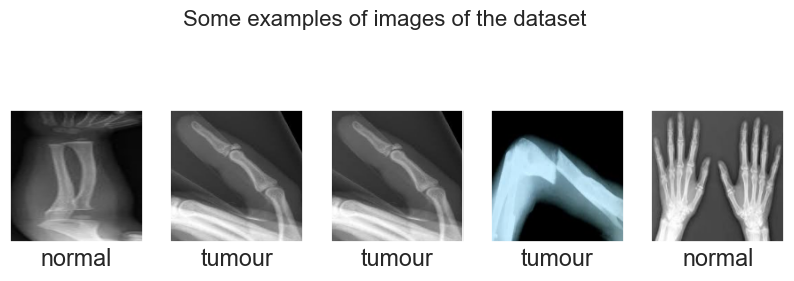

In [10]:
display_examples(class_names, train_images, train_labels)

In [11]:
batch_size =15
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [12]:
rcnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(7, activation=tf.nn.softmax)
])

In [13]:
rcnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = rcnn_model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 2.0216 - accuracy: 0.0290 - val_loss: 2.7319 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 2.1296 - accuracy: 0.5217 - val_loss: 0.9050 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.9026 - accuracy: 0.5217 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.6697 - accuracy: 0.5217 - val_loss: 0.6906 - val_accuracy: 0.5556
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.5632 - accuracy: 0.7391 - val_loss: 0.7651 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.5907 - accuracy: 0.6377 - val_loss: 0.7111 - val_accuracy: 0.5556
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.5576 - accuracy: 0.7391 - val_loss: 0.5901 - val_accuracy: 0.8333
Epoch 8/10
1/1 [=========================

In [15]:
test_loss = rcnn_model.evaluate(test_images, test_labels)

3/3 [==============================] - 1s 192ms/step - loss: 0.4106 - accuracy: 0.9540


1/1 [==============================] - 0s 249ms/step
[1]


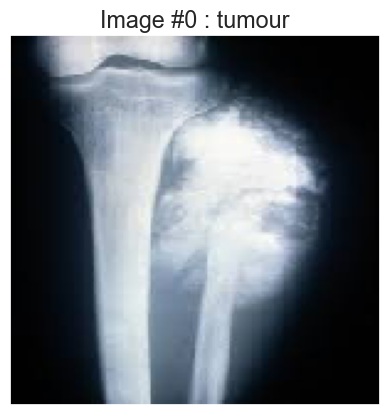

In [16]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:/Users/chandu/Music/bone tumour/train/tumour/6 - Copy.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = rcnn_model.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
print(pred_labels )
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()